### **Exploratory Data Analysis and Pre-Processing**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Project/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


1.Data contains 11 column and 16598 unique values

2.there are 271 missing values in Year column and 58 ones in Publisher

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**CHECK** **DUPLICATION**

In [7]:
len(df)-len(df.drop_duplicates())

0

In [8]:
# null values are little so i will drop them
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)
df['Publisher']=df['Year'].astype(int)

In [9]:
df.describe()

,Rank,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df["NA_Sales"].describe()

count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [11]:
df["Global_Sales"].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

In [12]:
df["JP_Sales"].describe()

count    16291.000000
mean         0.078833
std          0.311879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [13]:
df["EU_Sales"].describe()

count    16291.000000
mean         0.147731
std          0.509303
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [14]:
df["Other_Sales"].describe()

count    16291.000000
mean         0.048426
std          0.190083
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

In [15]:
c = df.columns
for col in c :
    print("les unique valeurs dans ",col,"  =",df[col].value_counts())
    print("----------------------")

les unique valeurs dans  Rank   = 2047     1
6790     1
12963    1
15010    1
8865     1
        ..
9534     1
15677    1
13628    1
3387     1
2049     1
Name: Rank, Length: 16291, dtype: int64
----------------------
les unique valeurs dans  Name   = Need for Speed: Most Wanted                        12
LEGO Marvel Super Heroes                            9
FIFA 14                                             9
Ratatouille                                         9
Lego Batman 3: Beyond Gotham                        8
                                                   ..
Medal of Honor: Infiltrator                         1
Street Fighter EX Plus Alpha                        1
Dragon Ball: Origins (JP & incomplete US sales)     1
Spitfire Heroes: Tales of the Royal Air Force       1
Battlefield 1942: The WW II Anthology               1
Name: Name, Length: 11325, dtype: int64
----------------------
les unique valeurs dans  Platform   = DS      2131
PS2     2127
PS3     1304
Wii     1290
X

In [16]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [17]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['Name', 'Platform','Genre', 'Publisher']
numericals = ['Rank', 'Year', 'NA_Sales','JP_Sales', 'Other_Sales', 'Global_Sales']

In [18]:
# numerical statistical summary
df[numericals].describe()

,Rank,Year,NA_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,10.220000,10.570000,82.740000


In [19]:
# categoricals statistical summary
df[categoricals].describe()

,Publisher
count,16291.000000
mean,2006.405561
std,5.832412
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


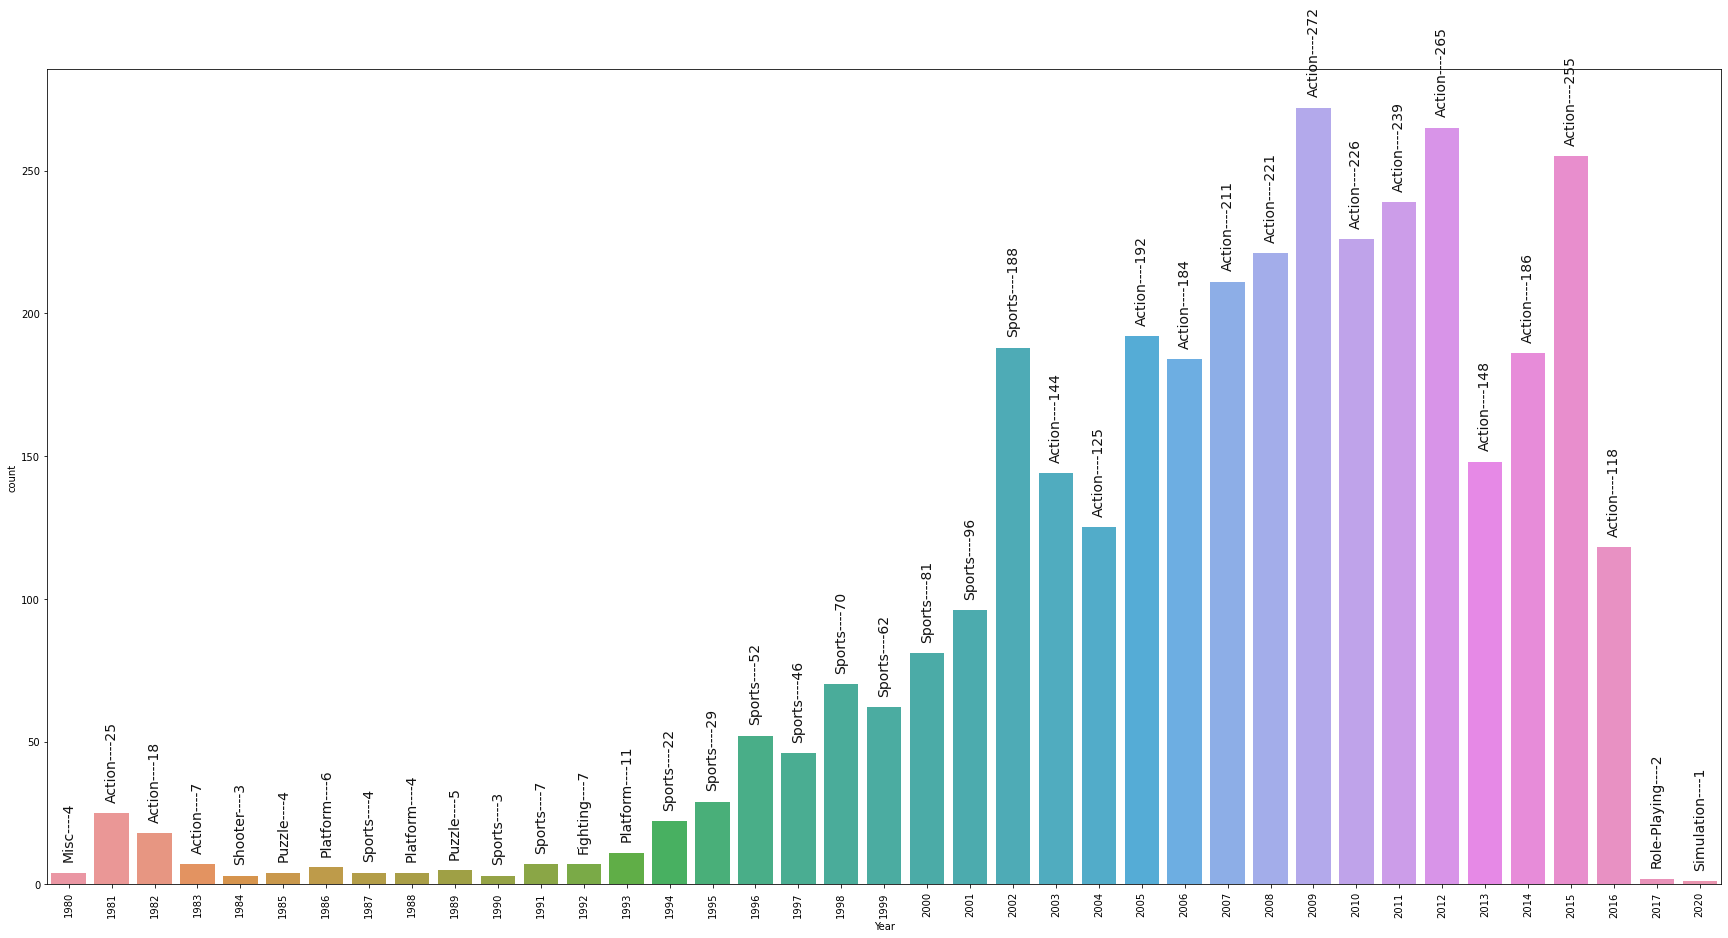

In [20]:
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#111', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

In [21]:
Top50byPublisher = df.nlargest(50, 'Global_Sales')[['Global_Sales', 'Name', 'Publisher']]
Top50byPublisher = Top50byPublisher.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='Number of Games')
Top50byPublisher

,Publisher,Number of Games
0,2006,4
1,1985,1
2,2008,2
3,2009,5
4,1996,2
5,1989,2
6,1984,1
7,2005,5
8,1999,1
9,2007,3


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

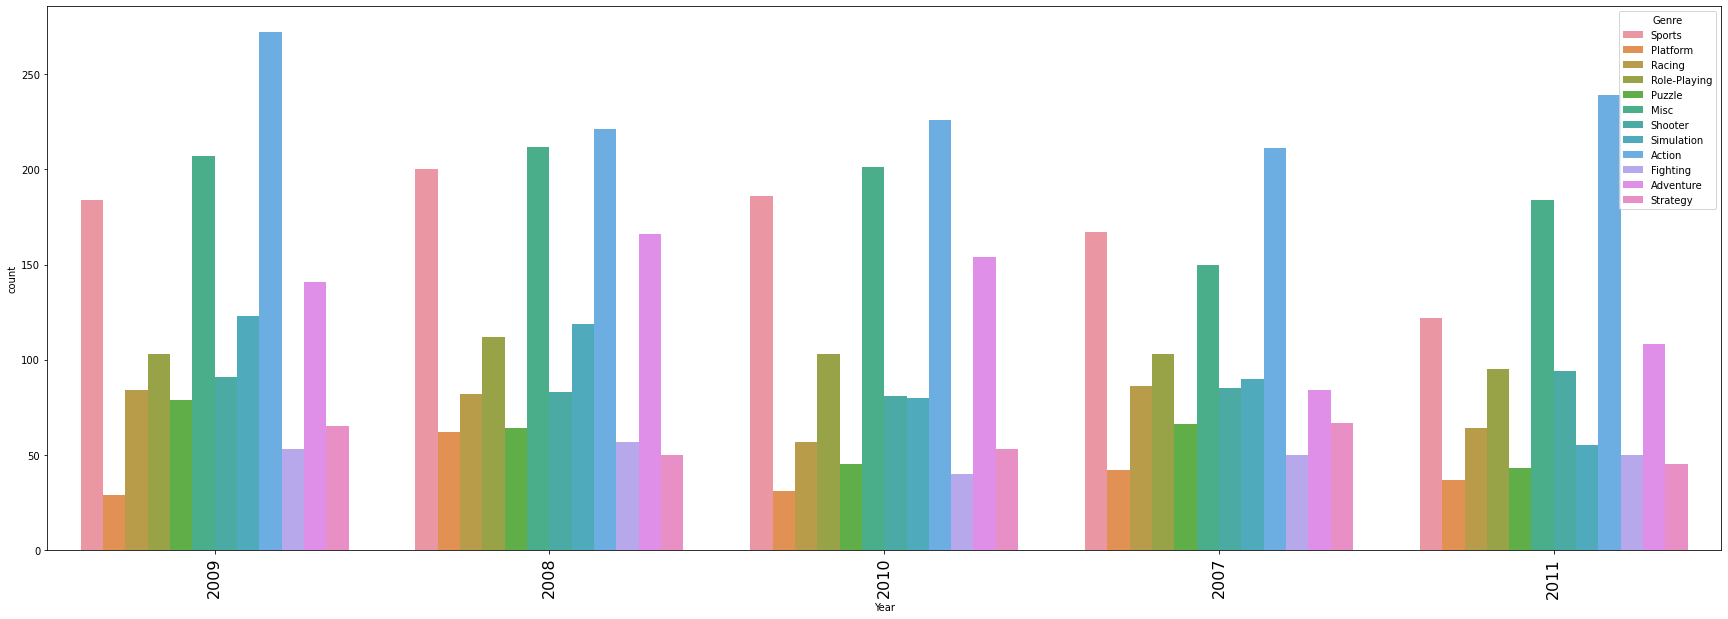

In [22]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


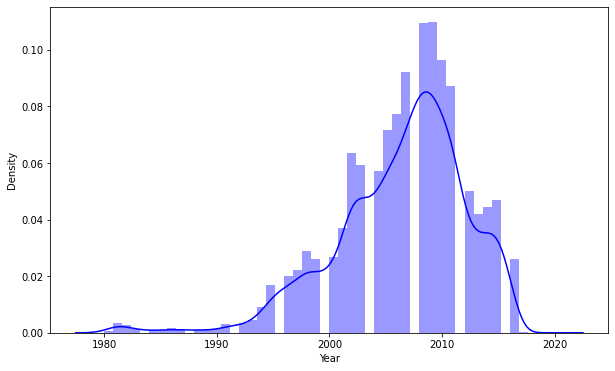

In [23]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'],color='blue')

Text(0.5, 1.0, 'Sales of different genre in Global_Sales')

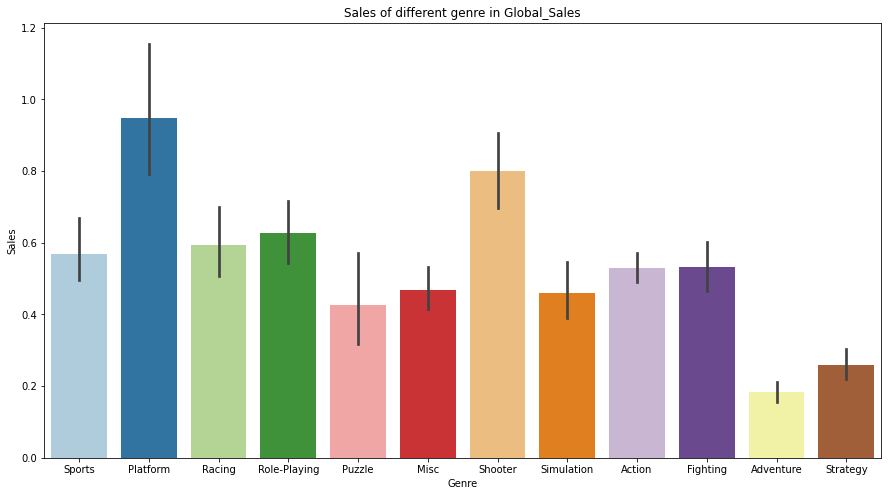

In [25]:
ax=plt.figure(figsize=(15,8))
sns.barplot(x='Genre',y='Global_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in Global_Sales')

**Boxplot to Detect Outliers**

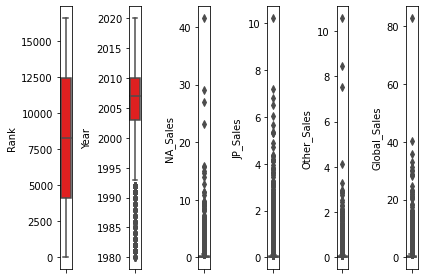

In [26]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

**Heat map to show Correlations**

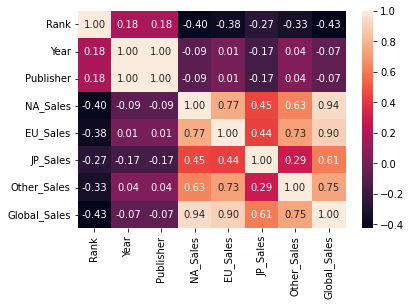

In [27]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [28]:
d = df.Genre.value_counts()
d

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

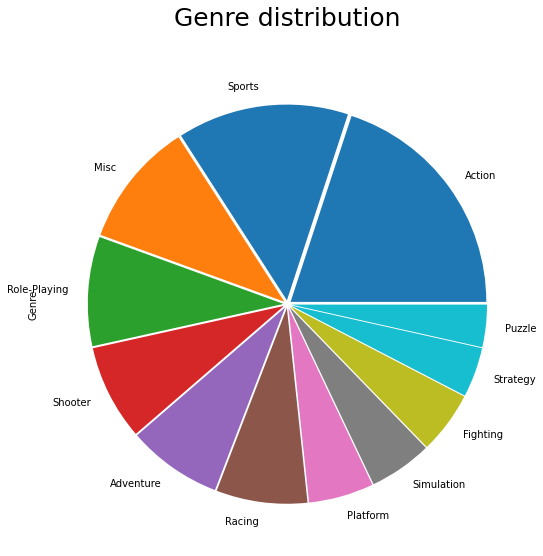

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9))
d.plot(kind='pie', colormap="tab10", explode=[0.02]*12)
plt.title("Genre distribution\n", fontsize=25)
plt.show()

Text(0.5, 1.0, 'Global sales with different platforms')

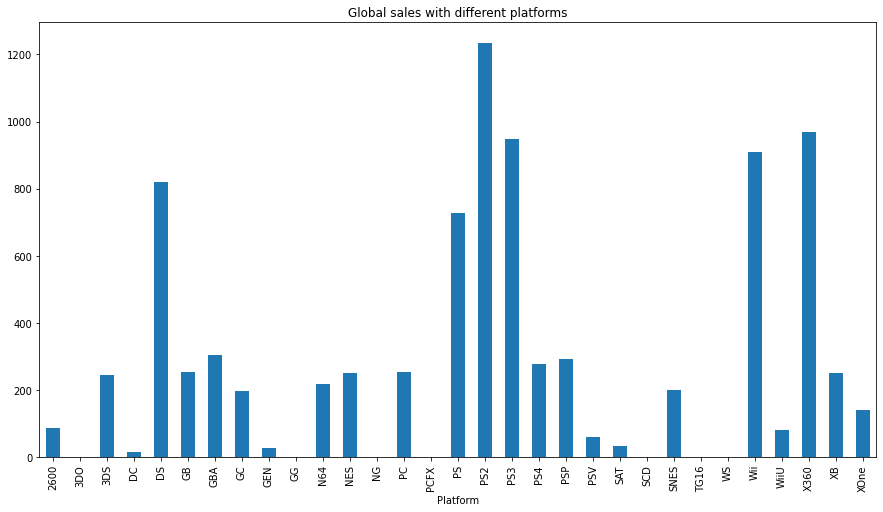

In [30]:
ax=plt.figure(figsize=(15,8))
d = df.groupby(['Platform'])['Global_Sales']
d.sum().plot.bar()
plt.title('Global sales with different platforms')

Text(0.5, 1.0, 'Other sales with different platforms')

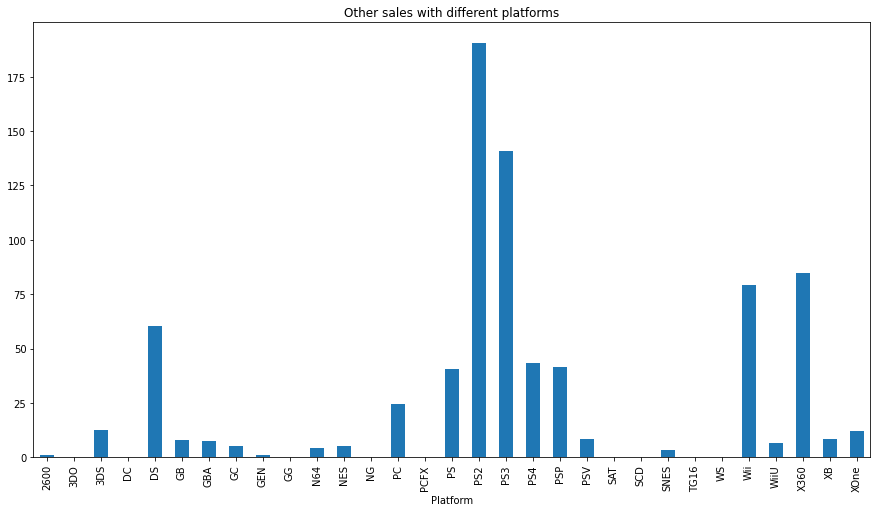

In [31]:
ax=plt.figure(figsize=(15,8))
d = df.groupby(['Platform'])['Other_Sales']
d.sum().plot.bar()
plt.title('Other sales with different platforms')

### **Data Modelling**

In [32]:
#### Random State
rs = 6

In [33]:
y = df[['Rank']]
x = df[['JP_Sales', 'Global_Sales', 'NA_Sales', 'EU_Sales']]

In [34]:
y.shape

(16291, 1)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = rs)

**Decision Tree Regression**

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [37]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [38]:
dt.predict(x_test.head())

array([ 8496.        , 11243.        , 13069.90909091,  6998.        ,
       16285.32244898])

In [39]:
y_pred = dt.predict(x_test)

In [40]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 120.66919282760368


**Random Forest Regression**

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train.values.ravel())
y_pred = rf.predict(x_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 118.84788324993904


**Intermediate Supervised Regression**

In [42]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [43]:
cat = ['Name', 'Platform', 'Genre', 'Publisher']
num = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global Sales' ]

In [44]:
x = df[['Name', 'Platform', 'Genre', 'Publisher']]
y = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' ]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = rs)

In [52]:
x_test

,Name,Platform,Genre,Publisher
8570,The King of Fighters XII,PS3,Fighting,2009
11186,PAC-MAN and the Ghostly Adventures,PS3,Platform,2013
12828,Medabots: Metabee,GBA,Role-Playing,2002
7118,All Star Karate,Wii,Action,2010
16322,Binary Star,PSV,Adventure,2014
...,...,...,...,...
13475,World Trigger: Borderless Mission,PSV,Action,2015
12555,Pop Cutie! Street Fashion Simulation,DS,Simulation,2008
7665,Ridge Racer,PSV,Racing,2011
14687,Samurai Warriors 2,PS3,Action,2013


In [53]:
x_test.shape

(4073, 4)

In [46]:
y_test

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8570,2009,0.11,0.01,0.03,0.01
11186,2013,0.03,0.04,0.00,0.01
12828,2002,0.04,0.01,0.00,0.00
7118,2010,0.14,0.07,0.00,0.02
16322,2014,0.00,0.00,0.01,0.00
...,...,...,...,...,...
13475,2015,0.00,0.00,0.04,0.00
12555,2008,0.06,0.00,0.00,0.00
7665,2011,0.04,0.08,0.05,0.03
14687,2013,0.00,0.00,0.03,0.00


In [54]:
y_test.shape

(4073, 5)

## **Conclusion**
1.Top 5 Video Games in Year is Action and the lower is Puzzle Games

2.In 2005 and 2009 publishers created the most games

3.Most published type of games is Action

4.At the Global Sales, PS2 are the best seller